## procedure of Training a perceptron via scikit-learn¶

In [5]:
# get variables
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [10]:
# training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)
# stratify=y to let dataset has same proportion of each class labels, random_state=1 define random number generator

In [15]:
# scaling: standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initialized a new StandardScaler object 
sc.fit(X_train)  # get parameter mean and standard deviation 
X_train_std = sc.transform(X_train) # standardize training dataset
X_test_std = sc.transform(X_test) # standardize testing dataset

In [17]:
# train 
from sklearn.linear_model import Perceptron 
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
# predict
y_pred = ppn.predict(X_test_std)

#### accuracy

In [20]:
# misclassfied number
(y_test!= y_pred).sum()

1

In [21]:
# classfication accuracy of the perceptron 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [22]:
# accuracy score
ppn.score(X_test_std,y_test)

0.9777777777777777

In [41]:
# plot 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')     

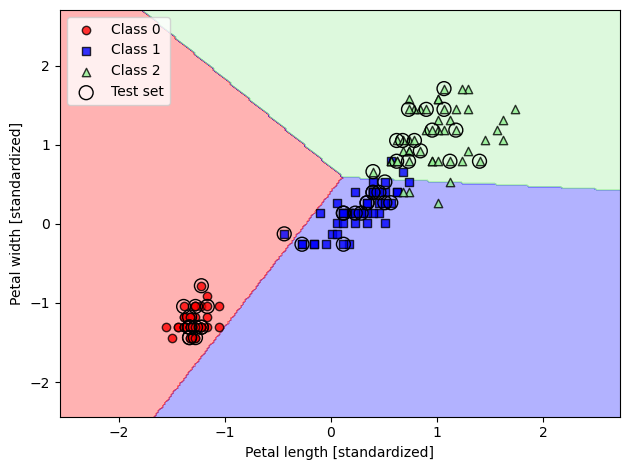

In [47]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn,test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

## logistic regression 


logistic regression don't have to be linear, compared to Adaline.
linear activation function with sigmoid, full batch gradient descent. 

In [48]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

logistic regression only work for binary classfication

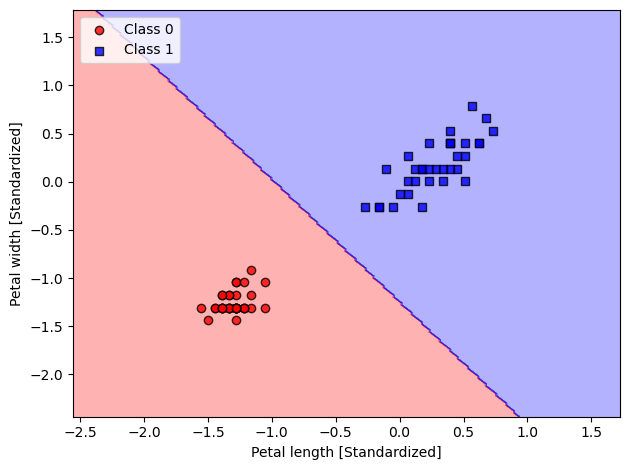

In [57]:
# implement logistic regression on Iris 
X_train_01_subset = X_train_std[(y_train == 0) | (y_train ==1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train ==1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000,random_state=1)  # load model and define parameters
lrgd.fit(X_train_01_subset,y_train_01_subset)    # train the model
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### OvR

OvR, which stands for One-vs-Rest (also known as One-vs-All or OvA), is a strategy used in machine learning for multi-class classification problems. It’s a method to adapt binary classification algorithms, which are naturally designed for distinguishing between two classes, to problems where there are more than two classes1

The difference between One-vs-Rest (OvR) and multinomial approaches lies in how they handle multi-class classification problems:

OvR (One-vs-Rest): In the OvR approach, a separate binary classifier is created for each class to distinguish it from all other classes. If there are ( N ) classes, you will have ( N ) classifiers. During prediction, each classifier gives a score for its class, and the class with the highest score is chosen as the final prediction1.

Multinomial: The multinomial approach, on the other hand, uses a single classifier to handle all classes simultaneously. It models the probability distribution over the multiple classes and predicts the class with the highest probability. This approach is also known as softmax regression when used in logistic regression. It’s more complex than OvR because it has to find boundaries between each pair of classes at the same time

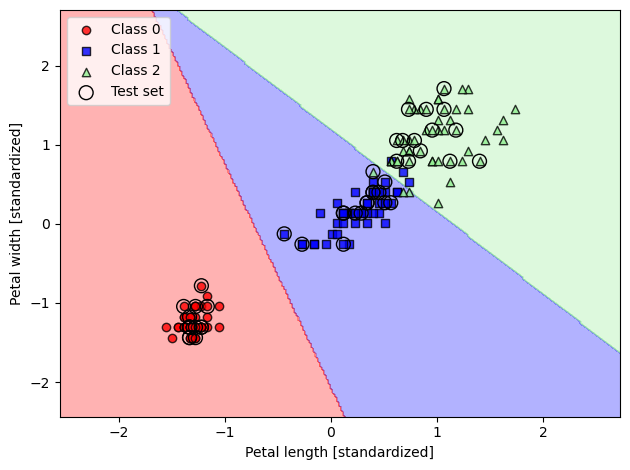

In [61]:
from sklearn.linear_model import LogisticRegression
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100.0,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr,test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

#### predict probability

In [64]:
lr.predict_proba(X_test_std[:3, :])   # each row represent on sample, each column represent the probablty of being that kind of floweer

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [66]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)  # row sum is 1 in each row

array([1., 1., 1.])

In [68]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)  # find biggest in each row, represent which flower it is 

array([2, 0, 0])

In [69]:
# easy way of doing it
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [71]:
# reshape if want to predict the class label of a single flower example:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

## regularization 

regularization is a bias-variance tradeoff, avoid overfitting and underfitting 

increasing the regularization parameter lambda, we increase the regularization strength. decreasing the value of the inverse regularization parameter,C, we increase the regularization strength

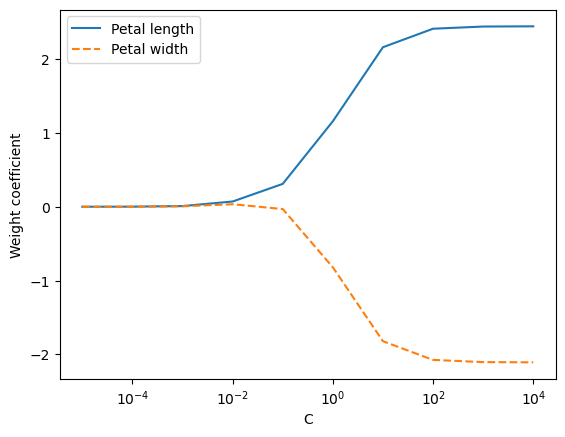

In [73]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show()

## Maximum margin classification with support vector machines

decision boundaries with large margins tend to have a lower generalization error, whereas models with 
small margins are more prone to overfitting.

### dealing with a nonlinearly separable case using slack variable

use C to control the penalty for misclassification, large values of C corresond to large error penalties, 
whereas we are less strict about the misclassification if smaller C was chosen 

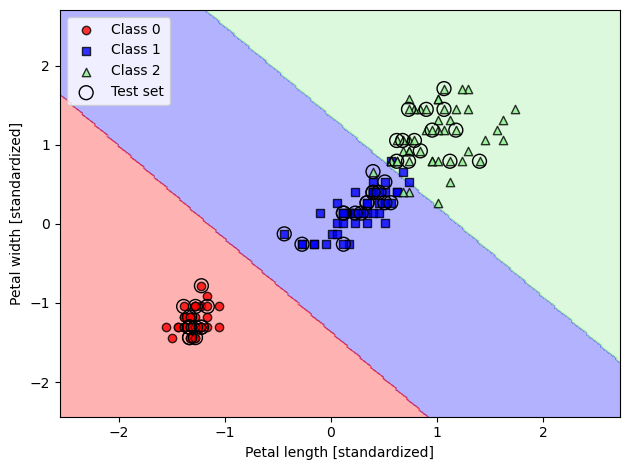

In [76]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

## alternative implementations of perceptron, logistic, and SVM

In [77]:
from sklearn.linear_model import SGDClassifier 
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving non-linear problems using a kernel SVM

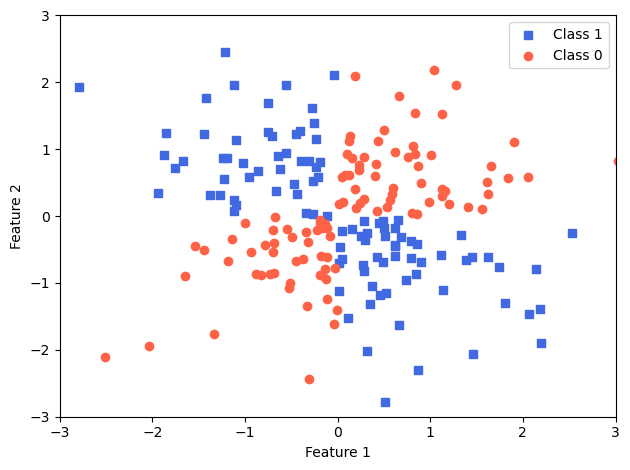

In [78]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

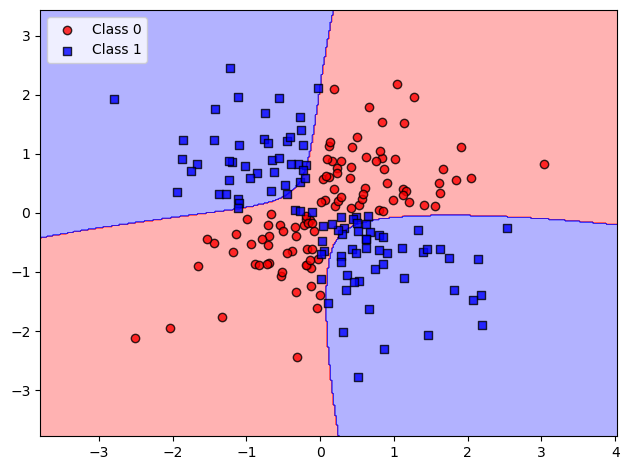

In [84]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

increase gamma to make the edge tigher 

# decision tree

Information gain is a concept used in decision trees and machine learning to measure the effectiveness of an attribute in classifying data. It calculates the reduction in entropy or surprise from transforming a dataset in some way. 

### Building a decision tree with a maximum depth of 4, using Gini impurity 

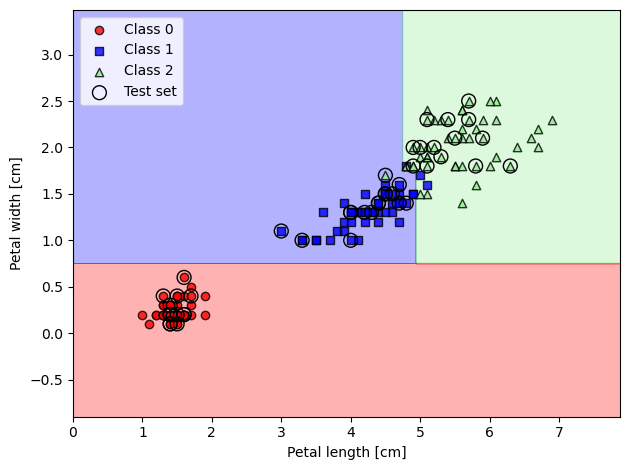

In [85]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

### visualize decision tree

left is answer true, right is answer false

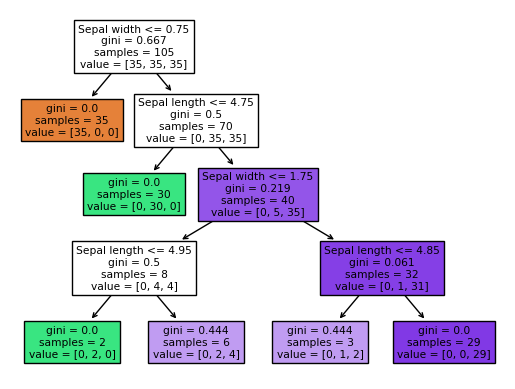

In [87]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

#plt.savefig('figures/03_21_1.pdf')
plt.show()

### random forest 

more robust, shrink size of bootstrap samples can increase the randomness of the random forest. 
increase size of bootstrap may cause overfitting. 
size of bootstrap sample is chosen to be equal to the number of training examples in the original dataset. 
number of features d equals to square root of m (number of features in the training dataset)

n_estimator is the number of decision trees; n_job is multiple (2 in this example) cores training in computer

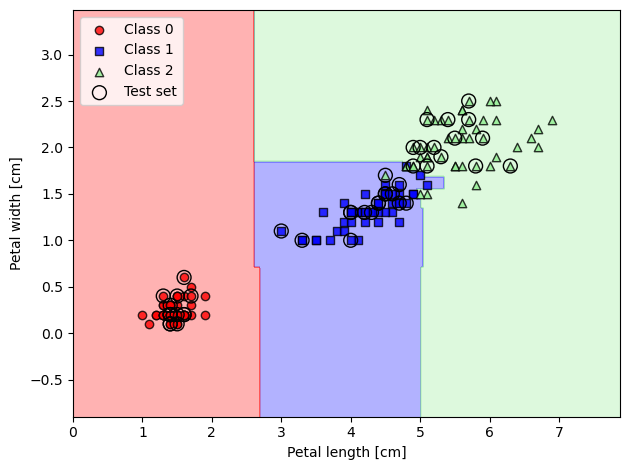

In [92]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()

## K-nearest neighbors - a lazy learning algorithm

parametric models(estimate parameters from training dataset): perceptron, logistic regression, linear SVM
non-parametric models(can't be characterized by a fixed set of parameters, number of parameters changes with the amount of training data): decision tree classifier/random forest, kenel(but not linear) SVM, KNN

KNN memorize the training dataset, advanages: immediately adapts as we collect new training data, downside:easy to overfitting with high dimensional data

### implement a KNN model in scikir-learn using a Eucliduean distance metric

k is crucial to finding a good balance between overfitting and underfitting. Euclidean distance mesure is used for 
real-value examples. it is important to standardize data so features contributes equally to the distance. 
minkowski distance is a generalization of the Euclidean distance. 
set p=2 is Euclidean distance and p=1 is Manhanttan distance 

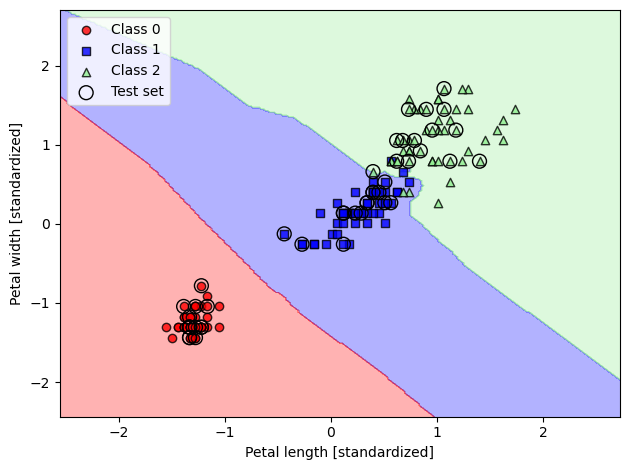

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()